<a href="https://colab.research.google.com/github/PAminai/fNIRS_Motor_Imaginery/blob/main/HeatMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mounting google drive to use uploaded dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#change directory to dtaset directory
#%cd drive/My Drive/fNIRS Competition 2022/Dataset
%cd /content/drive/MyDrive/fNIRs Competition 2022/Dataset

/content/drive/.shortcut-targets-by-id/1avZwjuTnjnFNhOKSeF5Bor3jxrHOgWqi/fNIRS Competition 2022/Dataset


In [ ]:
# useful packages
import scipy.io as sio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# loading data
sub_01 = sio.loadmat('sub01_Competition.mat')
sub_02 = sio.loadmat('sub02_Competition.mat')
sub_03 = sio.loadmat('sub03_Competition.mat')
sub_04 = sio.loadmat('sub04_Competition.mat')
sub_05 = sio.loadmat('sub05_Competition.mat')


In [ ]:
Hb_01 = sub_01.get('DataTrain_Hb')
HBO2_01 = sub_01.get('DataTrain_HbO2')
Label_01 =sub_01.get("ClassLabel_Train")

Hb_02 = sub_02.get('DataTrain_Hb')
HBO2_02 = sub_02.get('DataTrain_HbO2')
Label_02 =sub_02.get("ClassLabel_Train")

Hb_03 = sub_03.get('DataTrain_Hb')
HBO2_03 = sub_03.get('DataTrain_HbO2')
Label_03 =sub_03.get("ClassLabel_Train")

Hb_04 = sub_04.get('DataTrain_Hb')
HBO2_04 = sub_04.get('DataTrain_HbO2')
Label_04 =sub_04.get("ClassLabel_Train")

Hb_05 = sub_05.get('DataTrain_Hb')
HBO2_05 = sub_05.get('DataTrain_HbO2')
Label_05 =sub_05.get("ClassLabel_Train")

In [ ]:
# making dictionaries from variables
Hb_data = [Hb_01,Hb_02,Hb_03,Hb_04,Hb_05]
HBO2_data = [HBO2_01,HBO2_02,HBO2_03,HBO2_04,HBO2_05]
Labels = [Label_01,Label_02,Label_03,Label_04,Label_05]
subject_num = len(Labels)

In [ ]:
#splitting left(label==2) and right(label==1) trials for all subjects

#initializing left/right lists
Hb_right = []
HBO2_right =[]
Hb_left=[]
HBO2_left=[]


for k in range(subject_num): #move on subjects
  #temporary variables to store each subjects data
  Hb_right_k = []
  HBO2_right_k =[]
  Hb_left_k=[]
  HBO2_left_k=[]

  # each subject's data
  label = Labels[k]
  Hb = Hb_data[k]
  HBO2 = HBO2_data[k]

  for i in range(40): #move on 40 trials 
    if label[0,i]==1: 
      Hb_right_k.append(Hb[:,:,i])
      HBO2_right_k.append(HBO2[:,:,i])
    else:
      Hb_left_k.append(Hb[:,:,i])
      HBO2_left_k.append(HBO2[:,:,i])
    
  #saving data to right/left lists
  Hb_right.append(Hb_right_k)
  HBO2_right.append(HBO2_right_k)
  Hb_left.append(Hb_left_k)
  HBO2_left.append(HBO2_left_k)


In [ ]:
LEFT= Hb_left_k + HBO2_left_k
RIGHT = Hb_right_k + HBO2_right_k

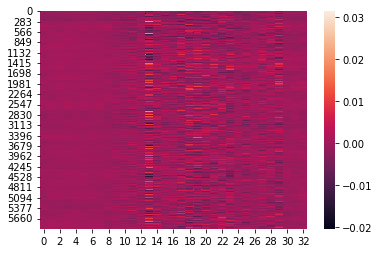

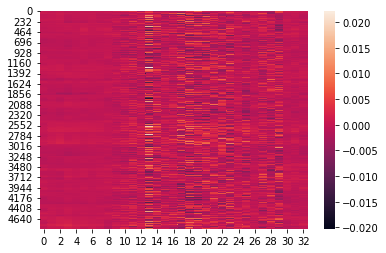

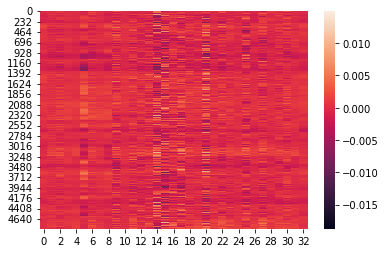

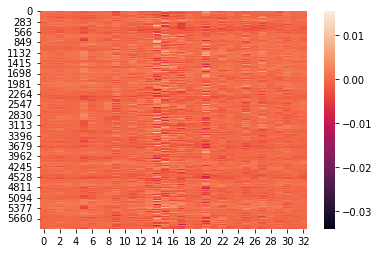

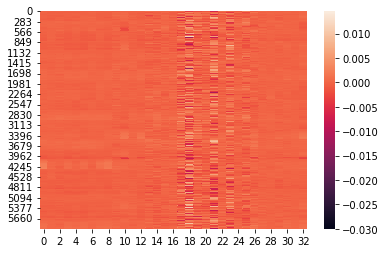

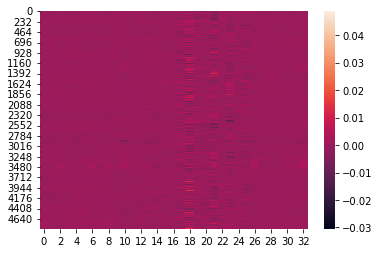

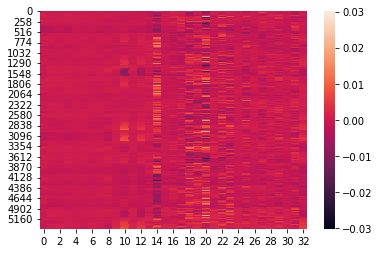

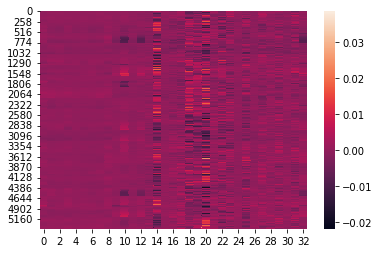

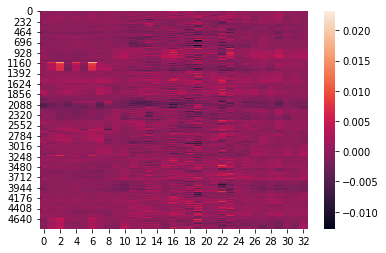

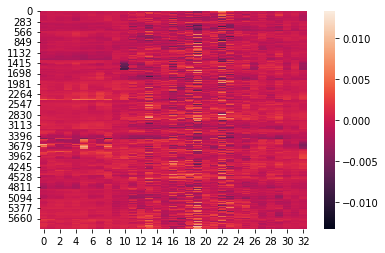

In [ ]:
# flattening data into 2d matrixes of size (n*270,33)
#Hb_right_flat = np.zeros((subject_num,...,33))
#HBO2_right_flat = 
#Hb_left_flat = 
#HBO2_left_flat = 
for k in range(subject_num): #move on subjects
  Hb_right_flat = np.reshape(np.array(Hb_right[k]),(-1,33))
  HBO2_right_flat = np.reshape(np.array(HBO2_right[k]),(-1,33))
  Hb_left_flat = np.reshape(np.array(Hb_left[k]),(-1,33))
  HBO2_left_flat = np.reshape(np.array(HBO2_left[k]),(-1,33))
  sns.heatmap(Hb_right_flat)
  #plt.imshow(Hb_right_flat, cmap='hot', interpolation='nearest')
  plt.show()
  sns.heatmap(Hb_left_flat)
  plt.show()
  




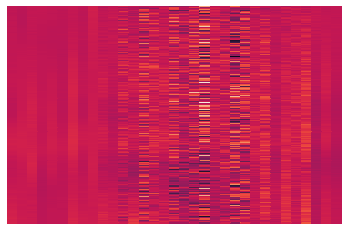

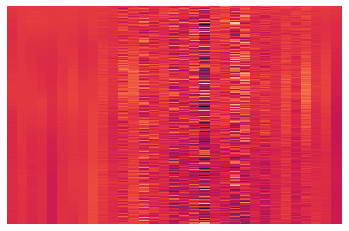

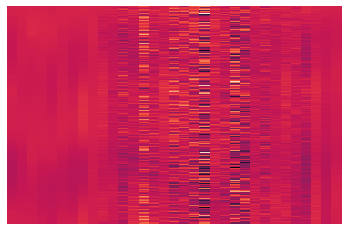

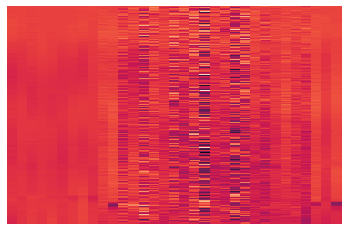

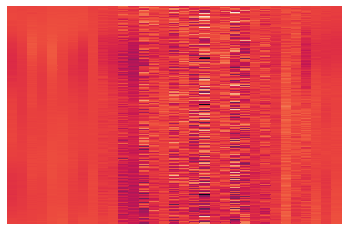

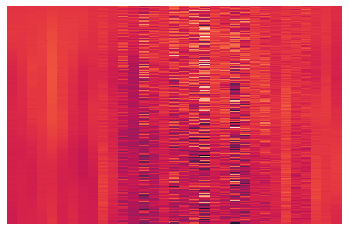

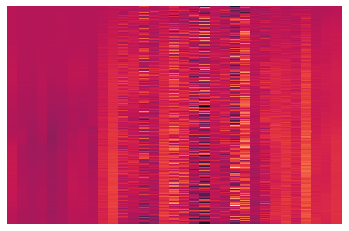

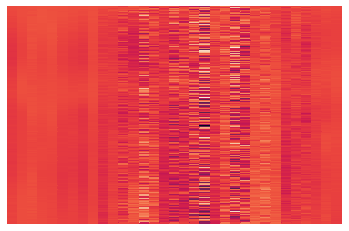

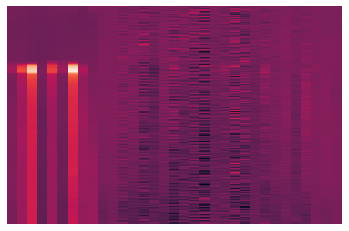

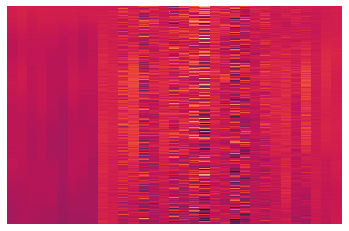

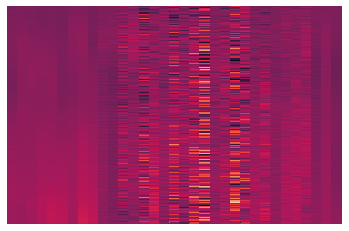

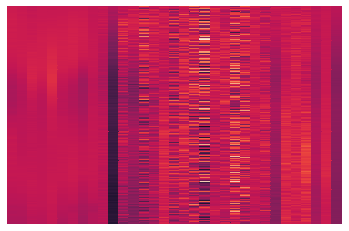

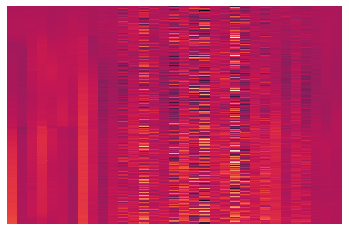

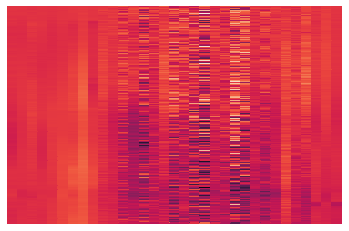

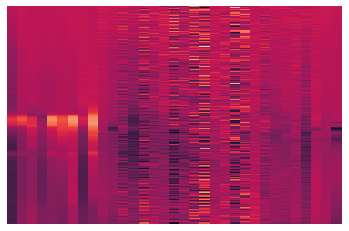

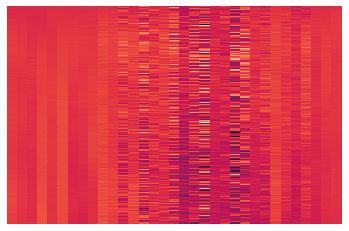

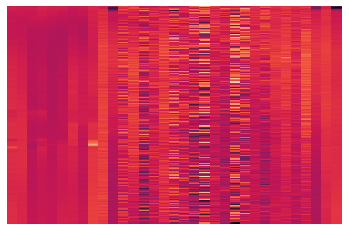

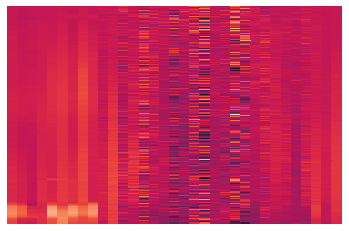

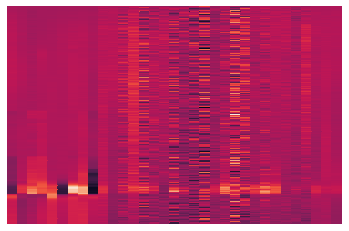

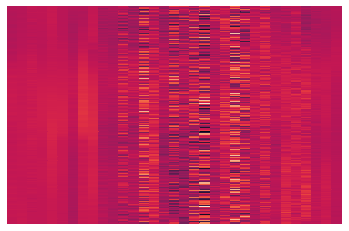

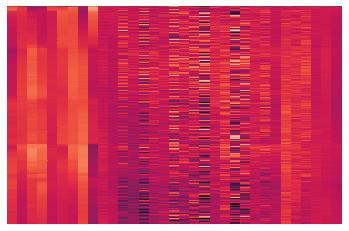

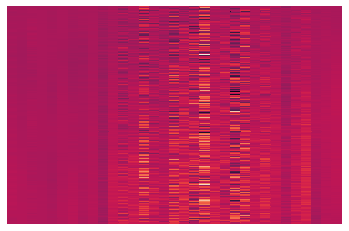

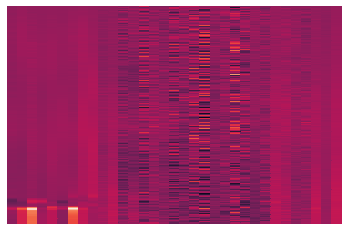

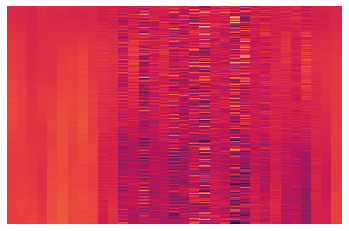

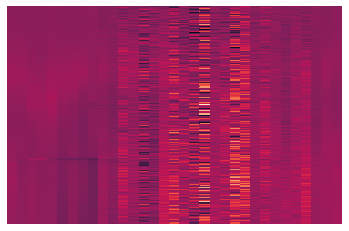

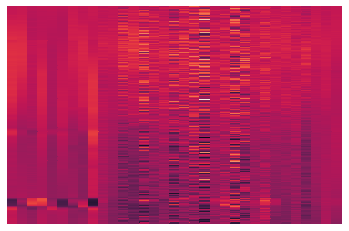

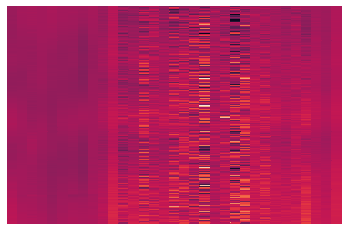

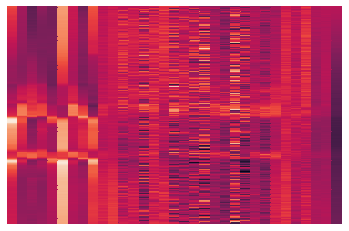

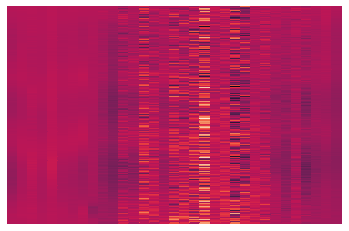

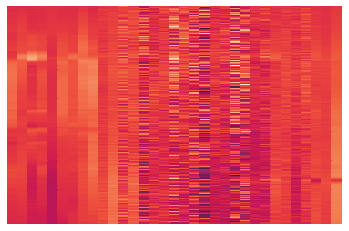

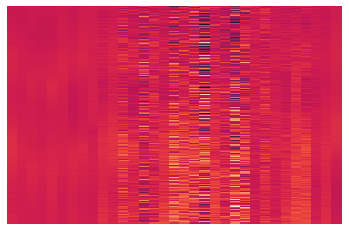

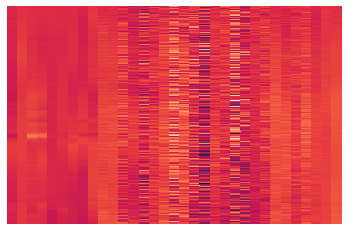

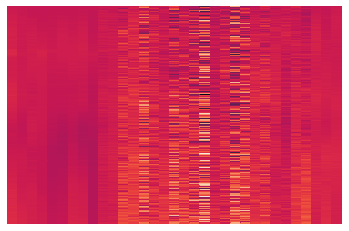

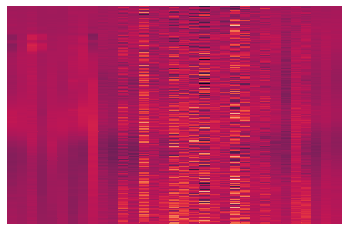

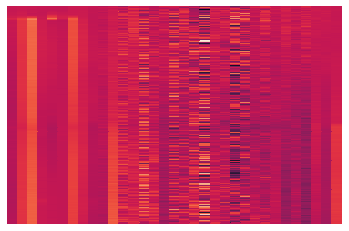

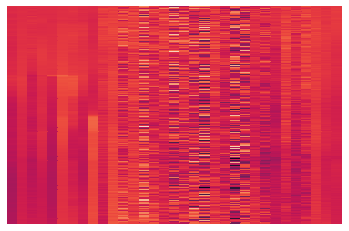

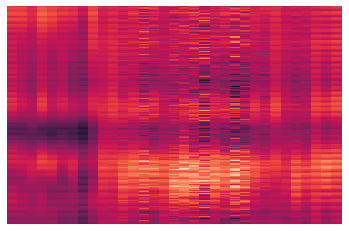

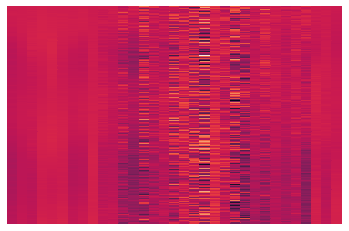

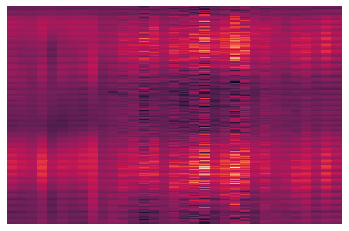

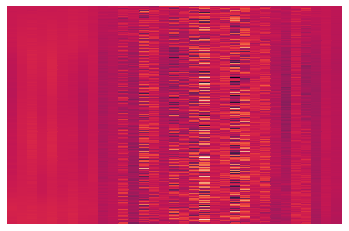

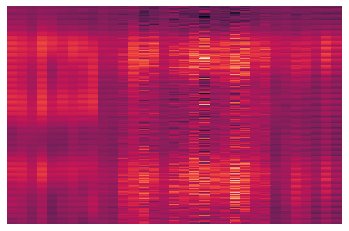

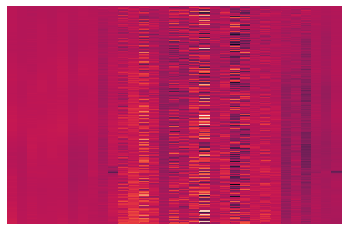

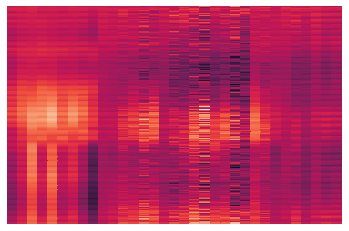

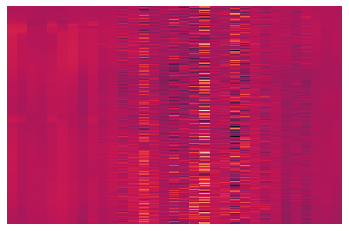

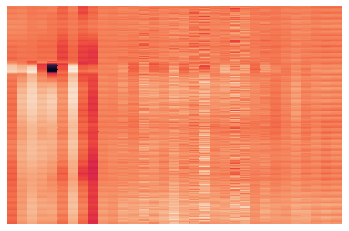

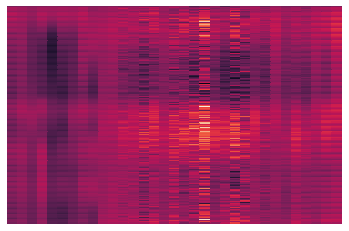

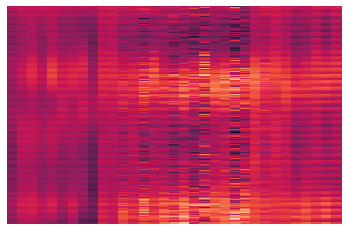

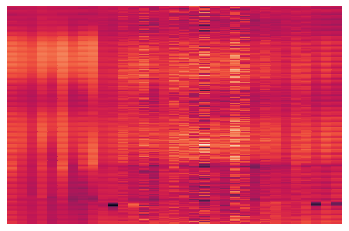

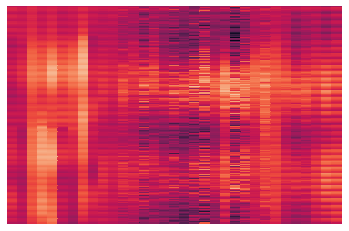

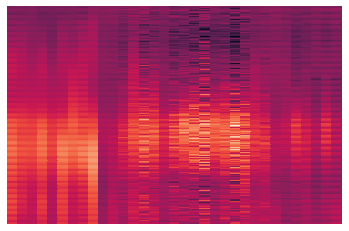

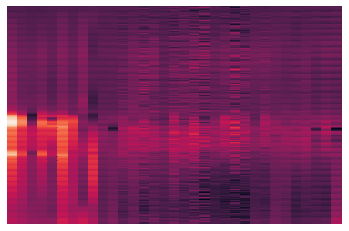

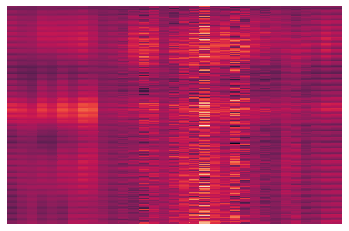

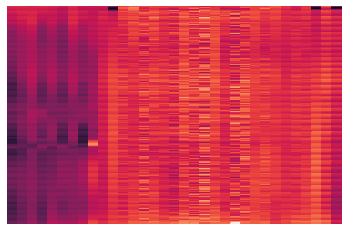

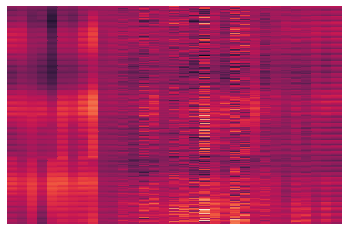

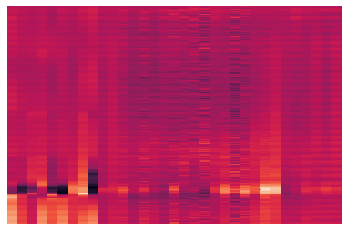

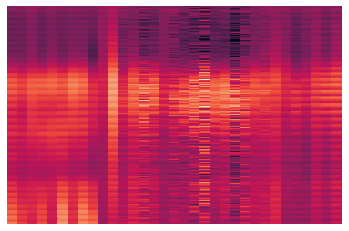

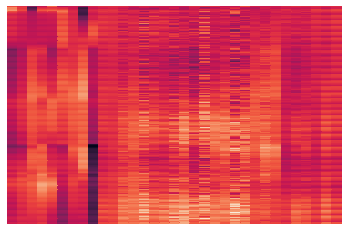

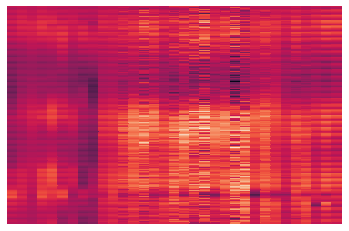

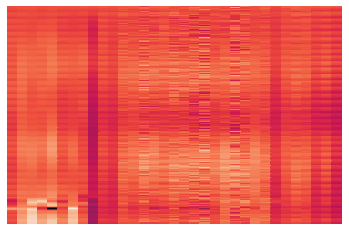

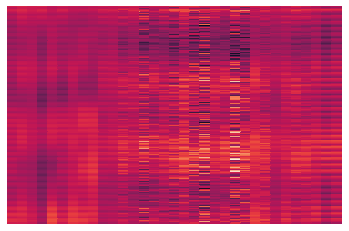

In [ ]:
# move on trials

from matplotlib import pyplot as plt
import seaborn as sns

for k in range(30): #move on subjects
  ks=str(k)
  right_flat = np.reshape(np.array(RIGHT[k]),(-1,33))
  left_flat = np.reshape(np.array(LEFT[k]),(-1,33))

  sns_plot=sns.heatmap(right_flat,cbar=False,yticklabels=False,xticklabels=False)

  results_path = '/content/drive/MyDrive/fNIRs Competition 2022/heatmap/CNN_Data/RIGHT'+ks+'.png'
  plt.savefig(results_path)
  plt.show()

  sns.heatmap(left_flat,cbar=False,yticklabels=False,xticklabels=False)
  results_path = '/content/drive/MyDrive/fNIRs Competition 2022/heatmap/CNN_Data/LEFT'+ks+'.png'
  plt.savefig(results_path)
  plt.show()

In [ ]:
Hb_right_flat = np.reshape(np.array(Hb_right[0]),(-1,33))
print(Hb_right_flat.shape)
print(Hb_right_flat)

(5940, 33)
[[-4.88744884e-04 -2.63162549e-04 -3.63755575e-04 ... -3.28946658e-04
  -4.90360689e-04  2.12327292e-04]
 [-4.70733235e-04 -3.25044494e-04 -4.58576306e-04 ... -4.37702872e-04
   4.76083065e-04 -1.03653666e-03]
 [-4.71341803e-04 -3.00225903e-04 -3.22634400e-04 ... -2.67813509e-05
   4.43331781e-05 -4.02402404e-04]
 ...
 [ 5.65471828e-04  1.26859046e-03  7.03037889e-04 ... -8.98978492e-04
  -1.11546730e-03 -2.38147771e-05]
 [ 5.83566058e-04  1.26394080e-03  6.21968507e-04 ... -9.18132598e-04
  -1.65687739e-04 -2.22341608e-04]
 [ 6.18640291e-04  1.32803545e-03  9.37448821e-04 ... -4.42126622e-04
  -3.57391840e-05  6.07716968e-04]]


# **ResNet34**

In [ ]:
# fast.ai lib
!pip install -Uqq fastbook

     |████████████████████████████████| 720 kB 5.0 MB/s 
     |████████████████████████████████| 1.2 MB 35.3 MB/s 
     |████████████████████████████████| 188 kB 40.7 MB/s 
     |████████████████████████████████| 60 kB 4.7 MB/s 


In [ ]:
# useful packages
import fastbook
from fastbook import *
import scipy.io as sio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from re import search

In [ ]:
dest= '/content/drive/MyDrive/fNIRs Competition 2022/heatmap/CNN_Data/'
%cd /content/drive/MyDrive/fNIRs Competition 2022/heatmap/CNN_Data

/content/drive/.shortcut-targets-by-id/1avZwjuTnjnFNhOKSeF5Bor3jxrHOgWqi/fNIRS Competition 2022/heatmap/CNN_Data


In [ ]:
sub_name = "LEFT"
def is_left(x):
    return sub_name in x
# --

dls = ImageDataLoaders.from_name_func(
    path=dest, fnames=get_image_files(dest),        
    valid_pct=0.1, seed=10,
    label_func=is_left, item_tfms=Resize(224)
)
